# Data Preprocessing and Visualization

## Libraries

In [1]:
# For the data-frame structure
import pandas as pd
# To initialize the random number generator 
import numpy as np
import random
# For spliting the data set
from sklearn.model_selection import train_test_split
# For plotting graphics
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# For text tokenization
import nltk
from nltk import tokenize
# For saving data
import pickle

## Data Frame

In [2]:
df = pd.read_csv("tcc_ceds_music.csv")
 
df.describe()

df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [3]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [4]:
len(df)

28372

## Preprocessing

It can not been understood the context of a song with less than 5 words, therefore they will be removed

In [5]:
len(df[df.len < 4])

30

In [6]:
df = df[df.len >= 4]

In [7]:
len(df)

28342

## Data Visualization

### Different genres

In [8]:
df['genre'].unique()

array(['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop'],
      dtype=object)

In [9]:
df['genre'].value_counts()

pop        7039
country    5443
blues      4600
rock       4033
jazz       3830
reggae     2494
hip hop     903
Name: genre, dtype: int64

### Scores

In [10]:
df[['valence','energy']]

,valence,energy
0,0.339448,0.137110
1,0.325021,0.263240
2,0.351814,0.139112
3,0.775350,0.743736
4,0.597073,0.394375
...,...,...
28367,0.751649,0.695686
28368,0.922712,0.797791
28369,0.838211,0.767761
28370,0.508450,0.885882


/opt/anaconda3/envs/Optimizacion/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


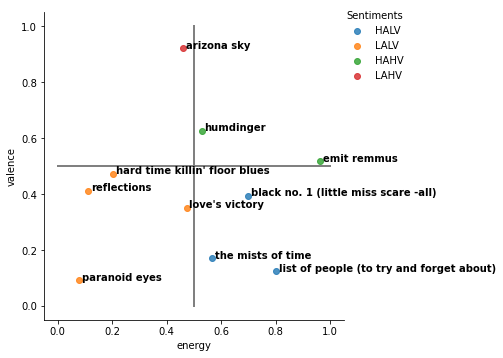

In [11]:
df['sentiment'] = df.apply(lambda x : 'HALV' if (x['energy']>0.5 and x['valence']<0.5) else ('LALV' if (x['energy']<=0.5 and x['valence']<0.5) else ('HAHV' if (x['energy']>0.5 and x['valence']>0.5) else 'LAHV')), axis=1)

g = sns.lmplot('energy', 'valence', data=df.sample(n = 10, random_state=7906858), hue='sentiment', fit_reg=False)
sns.move_legend(g, "upper right", bbox_to_anchor=(1, 1), title='Sentiments')

for index, row in df.sample(n = 10, random_state=7906858).iterrows():
    plt.text(row.energy+0.01, row.valence, row.track_name, horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.plot([0, 1], [0.5, 0.5], linewidth=2, c='grey')
plt.plot([0.5, 0.5], [0, 1], linewidth=2, c='grey')

plt.savefig('2Dplane.png', format="png")
plt.show()

**HALV**
*   Anger
*   Displease
*   Irritate
*   ...

**HAHV**
*   Happy
*   Joyful
*   Cheerful
*   ...

**LALV**
*   Sad
*   Sorrowful
*   Unhappy
*   ...

**LAHV**
*   Normal
*   Relax
*   Neutral
*   ...

In [12]:
df["sentiment"].value_counts()

HAHV    11087
LALV     6742
HALV     6021
LAHV     4492
Name: sentiment, dtype: int64

### Different scores' levels

In [13]:
df['energy level'] = df.apply(lambda x : 'H' if (x['energy']>=0.75) else ('MH' if (x['energy']>0.5 and x['energy']<0.75) else ('ML' if (x['energy']>0.25 and x['energy']<=0.5) else 'L')), axis=1)

df['valence level'] = df.apply(lambda x : 'H' if (x['valence']>=0.75) else ('MH' if (x['valence']>0.5 and x['valence']<0.75) else ('ML' if (x['valence']>0.25 and x['valence']<=0.5) else 'L')), axis=1)


In [14]:
df["energy level"].value_counts()

MH    9274
ML    7865
H     7834
L     3369
Name: energy level, dtype: int64

In [15]:
df["valence level"].value_counts()

MH    8884
ML    8133
H     6695
L     4630
Name: valence level, dtype: int64

### Combine energy and valence levels and plot the result

In [16]:
df['sentiment2'] = df[["energy level","valence level"]].apply(tuple, axis=1)

/opt/anaconda3/envs/Optimizacion/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


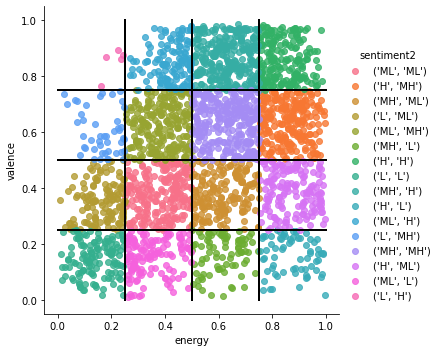

In [17]:
sns.lmplot('energy', 'valence', data=df.sample(n = 2500, random_state=79068588), hue='sentiment2', fit_reg=False)
plt.plot([0, 1], [0.75, 0.75], linewidth=2, c='black')
plt.plot([0, 1], [0.5, 0.5], linewidth=2, c='black')
plt.plot([0, 1], [0.25, 0.25], linewidth=2, c='black')
plt.plot([0.75, 0.75], [0, 1], linewidth=2, c='black')
plt.plot([0.5, 0.5], [0, 1], linewidth=2, c='black')
plt.plot([0.25, 0.25], [0, 1], linewidth=2, c='black')

plt.show()

In [18]:
df["sentiment2"].value_counts()

(MH, MH)    3146
(MH, H)     3049
(H, MH)     2796
(ML, ML)    2527
(ML, MH)    2432
(MH, ML)    2211
(H, H)      2096
(H, ML)     2052
(ML, L)     1458
(ML, H)     1448
(L, L)      1414
(L, ML)     1343
(H, L)       890
(MH, L)      868
(L, MH)      510
(L, H)       102
Name: sentiment2, dtype: int64

df["sentiment"].value_counts()

## 10 most frequent words and WordClouds

In [19]:
tokenSpace = tokenize.WhitespaceTokenizer()
def counter(text, columnText, quantity):
    allWords = ' '.join([text for text in text[columnText].astype('str')])
    tokenPhrase = tokenSpace.tokenize(allWords)
    frequency = nltk.FreqDist(tokenPhrase) 
    dfFrequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())}) 
    
    dfFrequency = dfFrequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    sns.set(font_scale = 2.5)
    ax = sns.barplot(data = dfFrequency, x = "Word", y = "Frequency", palette="husl")
    ax.set(ylabel = "Count")
    plt.xticks(rotation='horizontal')
    plt.show()

#### High Aarousal

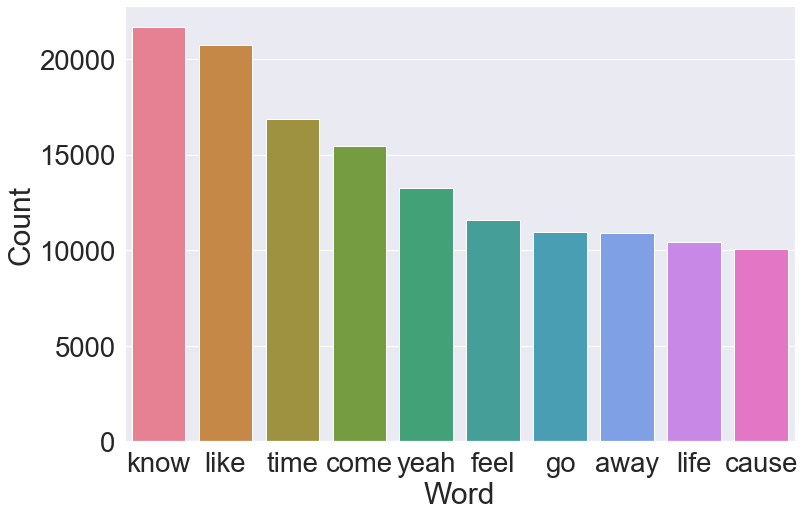

In [20]:
counter(df[df['sentiment'].isin(['HALV','HAHV'])], 'lyrics', 10)

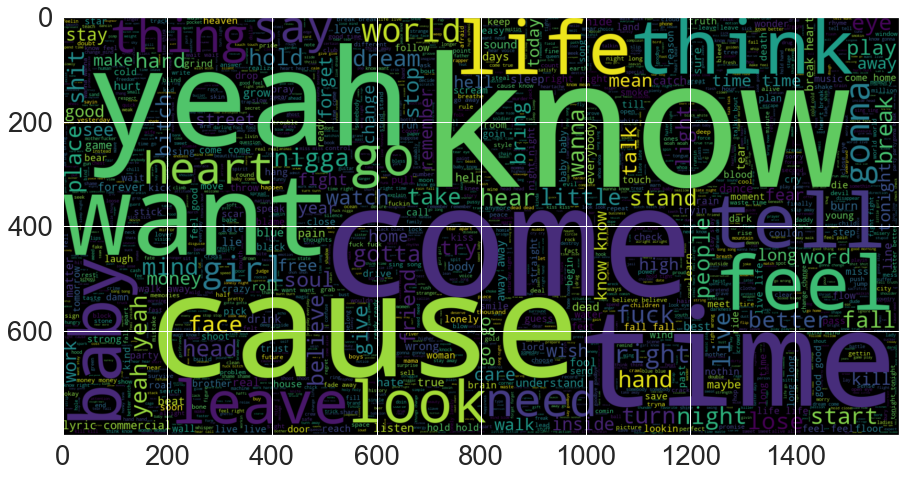

In [21]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df['sentiment'].isin(['HALV','HAHV'])].lyrics))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

#### Low Arousal

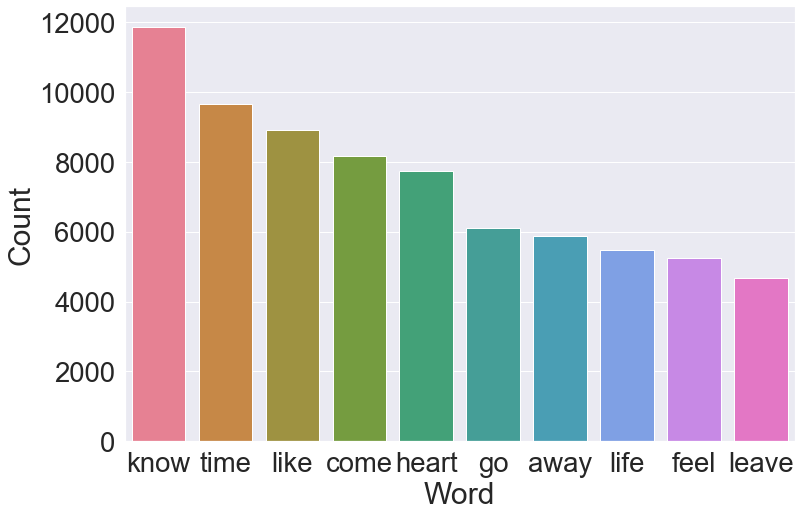

In [22]:
counter(df[df['sentiment'].isin(['LAHV','LALV'])], 'lyrics', 10)

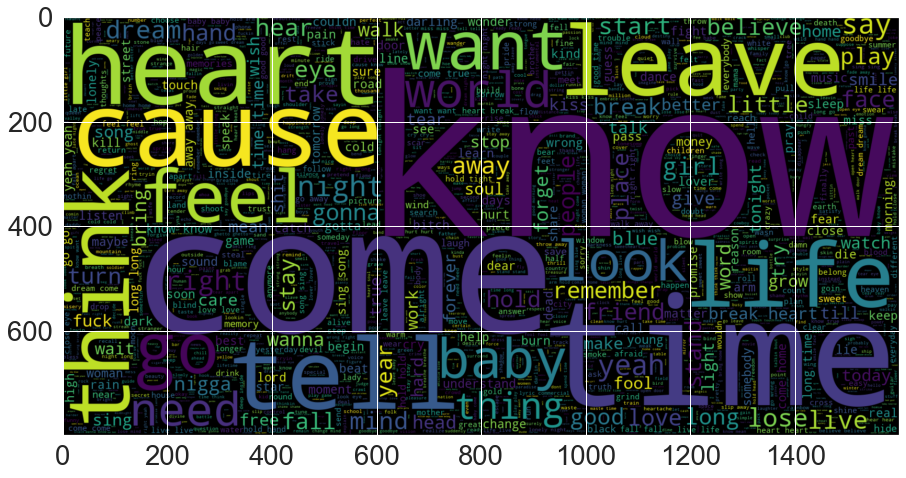

In [23]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df['sentiment'].isin(['LAHV','LALV'])].lyrics))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

#### High Valence

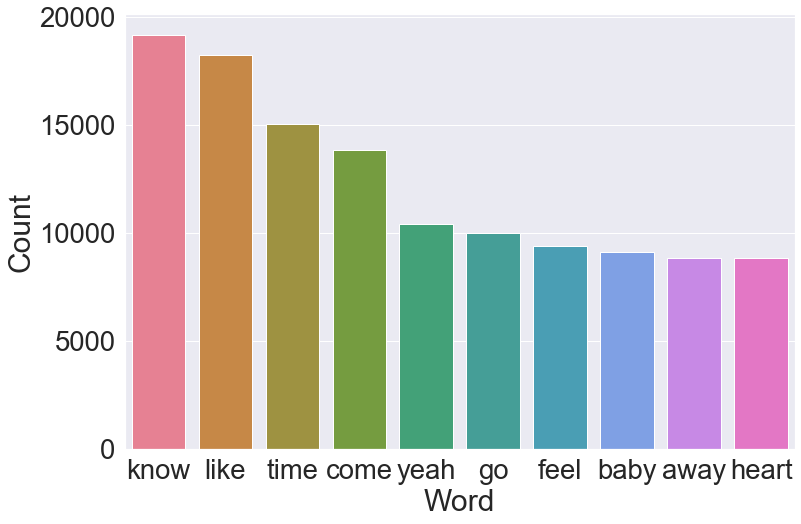

In [24]:
counter(df[df['sentiment'].isin(['LAHV','HAHV'])], 'lyrics', 10)

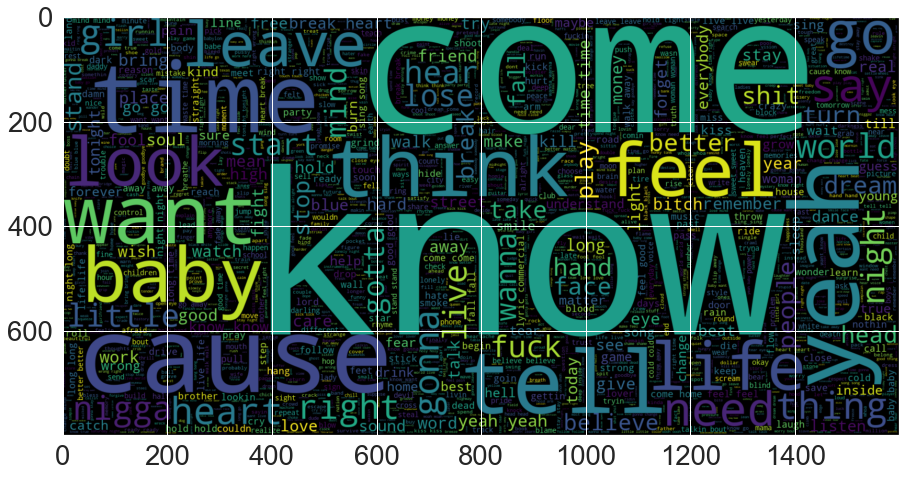

In [25]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df['sentiment'].isin(['LAHV','HAHV'])].lyrics))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

#### Low Valence

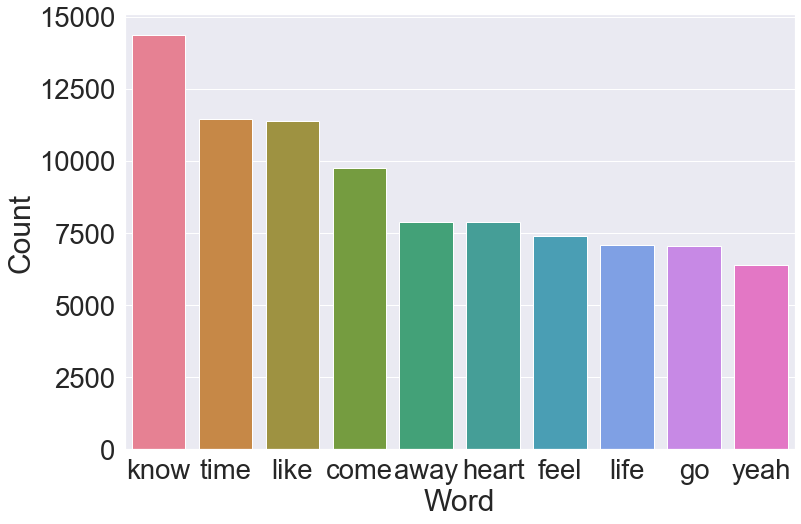

In [26]:
counter(df[df['sentiment'].isin(['LALV','HALV'])], 'lyrics', 10)

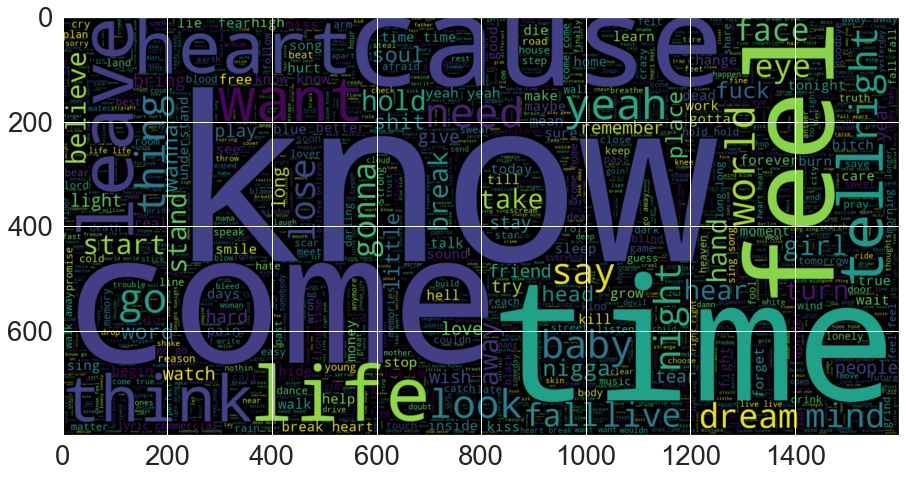

In [27]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df['sentiment'].isin(['LALV','HALV'])].lyrics))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

## Save data-frame

In [28]:
# Save df
f_df = open('df.pickle', 'wb')
pickle.dump(df, f_df)
f_df.close()

## Train-Test Split

In [29]:
train, test = train_test_split(df, test_size=0.2, random_state=79068588)

In [30]:
# Save train and test df
f_train_test = open('train_test.pickle', 'wb')
pickle.dump([train,test], f_train_test)
f_train_test.close()

### Different sized train sets

In [31]:
n_train = len(train)
train10 = train.sample(n= int(n_train*0.1), random_state=79068588)
train20 = train.sample(n= int(n_train*0.2), random_state=79068588)
train30 = train.sample(n= int(n_train*0.3), random_state=79068588)
train40 = train.sample(n= int(n_train*0.4), random_state=79068588)
train50 = train.sample(n= int(n_train*0.5), random_state=79068588)
train60 = train.sample(n= int(n_train*0.6), random_state=79068588)
train70 = train.sample(n= int(n_train*0.7), random_state=79068588)
train80 = train.sample(n= int(n_train*0.8), random_state=79068588)
train90 = train.sample(n= int(n_train*0.9), random_state=79068588)

In [32]:
# Save train samples dfs
f_train_samples = open('train_samples.pickle', 'wb')
pickle.dump([train10, train20, train30, train40, train50, train60, train70, train80, train90], f_train_samples)
f_train_samples.close()

In [33]:
len(train)

22673